## Group No : 62

## Group Member Names:
1. Avishek Kumar (2021sc04238@wilp.bits-pilani.ac.in)
2. Soumyadipta Maiti (2021sc04237@wilp.bits-pilani.ac.in)
3. Kumar Sreyam Nandi (2021sc04701@wilp.bits-pilani.ac.in)
4. Tanish Khanna (2021sc04236@wilp.bits-pilani.ac.in)

# 1. Import the required libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

#for download & unzip of files
import zipfile, requests
import urllib.request

#for modeling of Artificial Neural Network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical

#for cross-validation
from sklearn.model_selection import StratifiedKFold , KFold ,RepeatedKFold, cross_val_score

#for keras tuner
import keras_tuner
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

# for Evaluation of Classification
from sklearn.metrics import classification_report, confusion_matrix

import time
import warnings
warnings.filterwarnings(action = 'ignore')

# 2. Data Acquisition  -- Score: 0.5 Mark
 
For the problem identified by you, students have to find the data source themselves from any data source.


<h2>Fashion_mnist dataset</h2>

Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

More details can be found at [fashion_mnist homepage](https://www.tensorflow.org/datasets/catalog/fashion_mnist)

## 2.1 Code for converting the above downloaded data into a form suitable for DL

Below Code will download file from requested url into specified filename. But due to huge size of file, we are disabling calling of downlaod function

In [2]:
def download(url, name):
    r = requests.get(url, allow_redirects=True)
    open(name,'wb').write(r.content)

In [3]:
# download(url='https://www.cs.toronto.edu/%7Ekriz/cifar-10-python.tar.gz',  name='cifar-10-python.tar.gz')

Below code will unzip .tar file. It's commented due to huge size of file. 

In [4]:
# import tarfile
# file = tarfile.open('cifar-10-python.tar.gz')
# file.extractall('./Destination_FolderName')
# file.close()

In [5]:
def unpickle(filecontent):
    import pickle
    with open(filecontent, 'rb') as file:
        dictionary = pickle.load(file, encoding='bytes')
    return dictionary  

In [6]:
# file = 'Destination_FolderName/cifar-10-batches-py/data_batch_1'
# whole_file = unpickle(file)
# print(whole_file)

Alternatively, this dataset can be imported directly from TensorFlow Datasets

In [7]:
from tensorflow.keras.datasets import fashion_mnist

<h3>Loading of Fashion-MNIST dataset</h3>

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories,
along with a test set of 10,000 images. This dataset can be used as
a drop-in replacement for MNIST.

In [8]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

y_train_org = y_train.copy()
y_test_org = y_test.copy()

<h4> Image View from dataset </h4>

In [9]:
def image_view(image_row):
    plt.figure(figsize=(4,4))
    plt.imshow(x_train[image_row])
    plt.show()

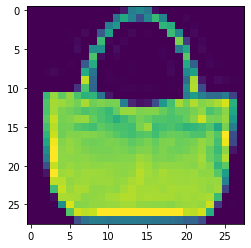

In [10]:
image_view(image_row=100)

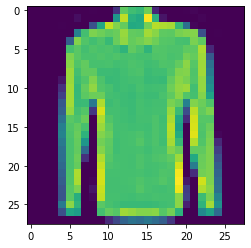

In [11]:
image_view(image_row=40)

<h4>ploting of first few images in grayscale</h4>

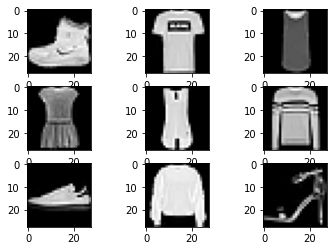

In [12]:
for count in range(9):
 # define subplot
 pyplot.subplot(330 + 1 + count)
 # plot raw pixel data
 pyplot.imshow(x_train[count], cmap=pyplot.get_cmap('gray'))

# show the figure
pyplot.show()

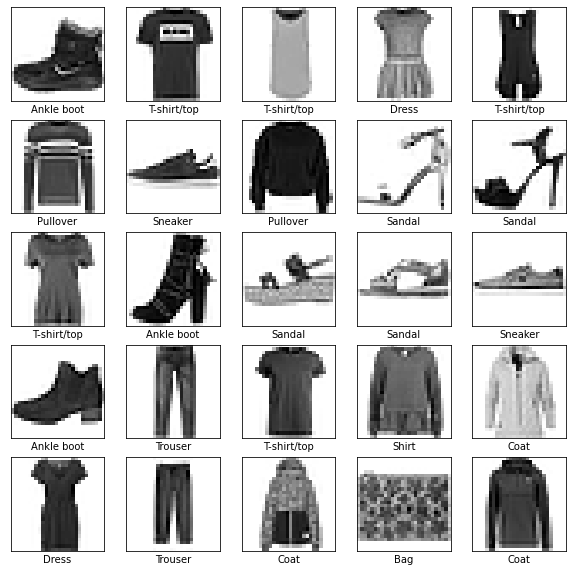

In [13]:
plt.figure(figsize=(10,10))

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

## 2.1 Write your observations from the above. 

1. [Size of the dataset](#Size-of-Dataset)
2. [What type of data attributes are there?](#Type-of-Data-Attributes)
3. [What are you classifying?](#What-are-you-classifying?)
4. [Plot the distribution of the categories of the target / label.](#Plot-Distribution-of-Categories-of-Target/Label)

<h4>Size of Dataset</h4>

In [14]:
print(f'Size of Entire FASHION_MNIST DatatSet : {x_train.shape[0]+x_test.shape[0]},{x_train.shape[1:]}')
print(f'Size of Training DatatSet : {x_train.shape}')
print(f'Size of Testing DatatSet : {x_test.shape}')

Size of Entire FASHION_MNIST DatatSet : 70000,(28, 28)
Size of Training DatatSet : (60000, 28, 28)
Size of Testing DatatSet : (10000, 28, 28)


**x_train**: uint8 NumPy array of grayscale image data with shapes
  `(60000, 28, 28)`, containing the training data.

**y_train**: uint8 NumPy array of labels (integers in range 0-9)
  with shape `(60000,)` for the training data.

**x_test**: uint8 NumPy array of grayscale image data with shapes
  (10000, 28, 28), containing the test data.

**y_test**: uint8 NumPy array of labels (integers in range 0-9)
  with shape `(10000,)` for the test data.

<h4>Type of Data Attributes</h4>

In [15]:
print(f'Data Type of Fields : {x_train.dtype}')

Data Type of Fields : uint8


<h4>What are you classifying?</h4>

In [16]:
print(f' Unique values to be classified : {np.unique(y_train)}')

 Unique values to be classified : [0 1 2 3 4 5 6 7 8 9]


The classes are:

| Label | Description |
|:-----:|-------------|
|   0   | T-shirt/top |
|   1   | Trouser     |
|   2   | Pullover    |
|   3   | Dress       |
|   4   | Coat        |
|   5   | Sandal      |
|   6   | Shirt       |
|   7   | Sneaker     |
|   8   | Bag         |
|   9   | Ankle boot  |

<h4>Plot Distribution of Categories of Target/Label</h4> 

In [17]:
unique_plt, count_plt = np.unique(y_train, return_counts=True)

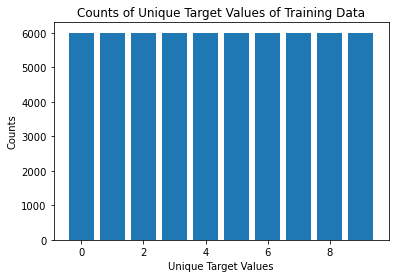

In [18]:
plt.bar(unique_plt, count_plt)
plt.xlabel('Unique Target Values')
plt.ylabel('Counts')
plt.title('Counts of Unique Target Values of Training Data')
plt.show()

# 3. Data Preparation -- Score: 1 Mark

Perform the data prepracessing that is required for the data that you have downloaded. 


This stage depends on the dataset that is used. 

## 3.1 Apply pre-processing techiniques

* [to remove duplicate data](#Removal-of-Duplicate-Data)
* [to impute or remove missing data](#Imputation-or-Removal-of-Missing-Data)
* [to remove data inconsistencies](#Removal-of-Data-Inconsistencies)
* [Encode categorical data](#Encoding-of-Categorical-Data)
* [Normalize the data](#Normalization-of-Data)
* [Feature Engineering](#Feature-Engineering)
* [Stop word removal, lemmatiation, stemming, vectorization](#Text-Preprocessing)


IF ANY

<h4>Removal of Duplicate Data</h4>

In [19]:
unique,count = np.unique(x_train, axis=0, return_counts=True)
duplicate = unique[count>1]

In [20]:
print(f'Number of Duplicate Rows in Training Data : {duplicate.shape[0]}')

Number of Duplicate Rows in Training Data : 0


<h4>Imputation or Removal of Missing Data</h4>

In [21]:
print(f'Number of Missing Rows in Training Data : {np.isnan(x_train).sum()}')

Number of Missing Rows in Training Data : 0


<h4>Removal of Data Inconsistencies</h4>

In [22]:
print(f'Training Data set is having minimum value as {x_train.min()} & maximum value as {x_train.max()}')
print(f'Testing Data set is having minimum value as {x_test.min()} & maximum value as {x_test.max()}')

Training Data set is having minimum value as 0 & maximum value as 255
Testing Data set is having minimum value as 0 & maximum value as 255


<h4>So, All values lie between 0 to 255. Hence, all values are consistent wrt this data.</h4>

<h4>Encoding of Categorical Data</h4>

In [23]:
print(f' There is no categorical values as datatype of its values are {x_train.dtype}')

 There is no categorical values as datatype of its values are uint8


<h4>Normalization of Data</h4>

In [24]:
print(f'Training Data set is having minimum value as {x_train.min()} & maximum value as {x_train.max()}')

Training Data set is having minimum value as 0 & maximum value as 255


In [25]:
#So, we need to normalize training & test data on deviding by 255 so that all values lie between 0 & 1
x_train = x_train/255
x_test = x_test/255

<h4>Feature Engineering</h4>

In [26]:
#Reshaping Input Variables
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

In [27]:
#conversion of input values from Integer to Float for more accuracy
x_train = x_train.astype(float)
x_test = x_test.astype(float)

No extra feature Engineering is required except Normalization as mentioned above

<h4>Text Preprocessing</h4>

Stop word removal, lemmatiation, stemming, vectorization are not Applicable as it's not a Natural language Problem

## 3.2 Identify the target variables.

* [Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)](#Separation-of-Data-for-Independent-and-Target-Variable)

* [Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.](#One-hot-Encoding-of-Target-variable)

<h4>Separation of Data for Independent and Target Variable(X,y)</h4> 

Seperation of Data into Indepedent(x_train, x_test)  & Target Variable(y_train, y_test) is already performed previously while calling **load_data()** method as shown below:

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [28]:
print(f'Shape of Indepedent Variables = {x_train.shape} & Target Variable = {y_train.shape} in Training Data')

Shape of Indepedent Variables = (60000, 28, 28, 1) & Target Variable = (60000,) in Training Data


<h4>One-hot Encoding of Target variable</h4>

In [29]:
y_train_cat = to_categorical(y_train,num_classes=10)
y_test_cat = to_categorical(y_test,num_classes=10)

In [30]:
print(f'Shape of Target Variable in Training Set before & after One-hot Encoding are {y_train.shape} & {y_train_cat.shape}')
print(f'Shape of Target Variable in Testing Set before & after One-hot Encoding are {y_test.shape} & {y_test_cat.shape}')

Shape of Target Variable in Training Set before & after One-hot Encoding are (60000,) & (60000, 10)
Shape of Target Variable in Testing Set before & after One-hot Encoding are (10000,) & (10000, 10)


## 3.3 Split the data into training set and testing set

Split of Data into Training(x_train, y_train) & Testing Set(x_test, y_test) is already performed previously while calling **load_data()** method as shown below:

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [31]:
print(f'Shape of Training Set = {x_train.shape} & Testing Set = {x_test.shape} for independent variables')

Shape of Training Set = (60000, 28, 28, 1) & Testing Set = (10000, 28, 28, 1) for independent variables


## 3.4 Preprocessing report

Mention the method adopted  and justify why the method was used
* to remove duplicate data, if present 
* to impute or remove missing data, if present 
* to remove data inconsistencies, if present 
* to encode categorical data 
* the normalization technique used

If the any of the above are not present, then also add in the report below.

Report the size of the training dataset and testing dataset


<h4>Methods adopted and justify why the method was used</h4>

- to remove duplicate data, if present :<br>
  **unique,count = Numpy.unique(x_train, axis=0, return_counts=True)** 
  **count** is used to return counts of all unique rows of training arrayset & then checking their counts > 1 to detect duplicacy. Above method automatically removes duplicate values & store unique values in **unique** variable.



- to impute or remove missing data, if present:<br>
  No missing values are present in this dataset.  


- to remove data inconsistencies, if present:<br>
  No inconsistent data are present in this dataset.


- to encode categorical data:<br>
  There is no categorical values as datatype of its values are uint8.<br>
  One-hot Encoding of Target variable is performed to convert into from 1 to 10.



- the normalization technique used:<br>
  Training Data set is having minimum value as 0.0 & maximum value as 255.0. <br>
  So, we need to normalize training & test data on deviding by 255 so that all values lie between 0 & 1


# 4. Deep Neural Network Architecture - Score:  Marks


## 4.1 Design the architecture that you will be using

* [Sequential Model Building with Activation for each layer.](#Sequential-Model-Building-with-Activation-Function)
* [Add dense layers, specifying the number of units in each layer and the activation function used in the layer.](#Configuration-of-Each-Layer-(no-of-units,-activation-function,-etc))
* [Use Relu Activation function in each hidden layer](#Configuration-of-Each-Layer-(no-of-units,-activation-function,-etc))
* [Use Sigmoid / softmax Activation function in the output layer as required](#Configuration-of-Each-Layer-(no-of-units,-activation-function,-etc))

DO NOT USE CNN OR RNN. 

<h1> Modeling using Artificial neural Network (ANN) </h1>

Although this Computer Vision problem could be solved preferebly using Convolution Neural Network (CNN), we could not use it as mentioned in problem statement 

<h3>Creation of ANN Model</h3>

<h4>Sequential Model Building with Activation Function</h4>

<h4>Configuration of Each Layer (no of units, activation function, etc)</h4>

In [32]:
def ANN_Creation(x_train, y_train_cat, no_hidden_layer=5, kernel_regularizer=0.01, bias_regularizer=0.01, 
                 activity_regularizer=0.01,dropout_rate=0.2):
    
    model_ann = Sequential()
    
    #Input layer
    model_ann.add(Flatten(input_shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3])))
    model_ann.add(Dropout(dropout_rate))
    
    for count in range(no_hidden_layer, 0, -1):
        
        #Hidden Layer i
        model_ann.add(Dense(units=count*32, activation='relu', kernel_regularizer=regularizers.l2(kernel_regularizer), 
                            bias_regularizer=regularizers.l2(bias_regularizer), 
                            activity_regularizer=regularizers.l2(activity_regularizer)))
        
        model_ann.add(Dropout(dropout_rate))

    #Output Layer
    model_ann.add(Dense(units=y_train_cat.shape[1], activation='softmax'))
    return model_ann

In [33]:
model_ann = ANN_Creation(x_train=x_train, y_train_cat=y_train_cat, no_hidden_layer=5, dropout_rate=0.0)

## 4.2 DNN Report

Report the following and provide justification for the same.



* [Number of layers](#Summary-of-Model)
* [Number of units in each layer](#Summary-of-Model)
* [Total number of trainable parameters](#Summary-of-Model)

In [34]:
model_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 160)               125600    
                                                                 
 dropout_1 (Dropout)         (None, 160)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               20608     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 96)                1

<h4>Summary of Model</h4>

- Number of layers:<br>
  As it's a Deep Learning Model, we need to set minimum total no of Layers = 4 having 3 hidden layers & one output Layer. Input Layer is not considered while calculating total no of Layers of any Neural Network. Will keep on increasing hidden layer to check its performance.
 
 
- Number of units in each layer:<br>
  We keep this as multiple of 32. e.g.--> If total no of hidden layers are 5, then 1-st till 5-th hidden layers are having number of units/neurons as n * 32 in decreasing order so that they are 160(=5*32), 128(=4*32), 96(=3*32), 64(=5*32) & 32(=1*32) respectively.<br>
  
  No. of units of First Layer = Flattening of Input Demensions of Training Set = 28*28 = 784 <br>
  No. of units of Output Layer = Number of Classes of Multi-Class Target variable = 10
  
  
  
- Total number of trainable parameters:<br>
  It's 167,210 (summing 0, 125600, 20608, 12384, 6208, 2080 & 330 respectively starting from input till output layer). 
  

# 5. Training the model - Score: 1 Mark


## 5.1 Configure the training

Configure  the model for training, by using appropriate [optimizers](#Optimizer) and [regularizations](#Regularization)

[Compile with categorical CE loss and metric accuracy.](#Compilation-of-ANN)

<h4>Optimizer</h4>

- Optimizers are algorithms or methods used to change attributes (such as weights, learning rate, momentum) of neural network in order to reduce losses.

In [35]:
adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,)

<h4>Regularization</h4>

It's used to prevent overfitting and improve the generalization performance of a model. It involves adding a penalty term to the loss function during training. Regularization methods include L1 and L2 regularization, dropout, early stopping, and more.

<h4>Compilation of ANN</h4>

- loss='categorical_crossentropy' is used for calcuation of loss for multi-class categorical variable <br>
- metrics: List of metrics('accuracy', 'mse') to be evaluated by the model during training & testing. 'accuracy' is used here.

In [36]:
model_ann.compile(optimizer='adam',
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

<h4>Training of simple ANN Model as defined in section 4.1</h4>

In [37]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [38]:
print(f'{x_train.shape} ; {y_train_cat.shape} :: {x_test.shape}; {y_test_cat.shape}')

(60000, 28, 28, 1) ; (60000, 10) :: (10000, 28, 28, 1); (10000, 10)


In [39]:
model_ann.fit(x=x_train, 
              y=y_train_cat,
              epochs=100, 
              batch_size=200,
              validation_data=(x_test, y_test_cat), 
              verbose=2, 
              callbacks=[early_stop]
             )

Epoch 1/100
300/300 - 5s - loss: 2.6184 - accuracy: 0.5538 - val_loss: 1.3154 - val_accuracy: 0.7754 - 5s/epoch - 18ms/step
Epoch 2/100
300/300 - 2s - loss: 1.1790 - accuracy: 0.7992 - val_loss: 1.1031 - val_accuracy: 0.8129 - 2s/epoch - 6ms/step
Epoch 3/100
300/300 - 2s - loss: 1.0438 - accuracy: 0.8275 - val_loss: 1.0343 - val_accuracy: 0.8217 - 2s/epoch - 7ms/step
Epoch 4/100
300/300 - 2s - loss: 0.9699 - accuracy: 0.8377 - val_loss: 0.9660 - val_accuracy: 0.8300 - 2s/epoch - 8ms/step
Epoch 5/100
300/300 - 2s - loss: 0.9205 - accuracy: 0.8440 - val_loss: 0.9316 - val_accuracy: 0.8262 - 2s/epoch - 8ms/step
Epoch 6/100
300/300 - 2s - loss: 0.8852 - accuracy: 0.8465 - val_loss: 0.8996 - val_accuracy: 0.8345 - 2s/epoch - 8ms/step
Epoch 7/100
300/300 - 1s - loss: 0.8527 - accuracy: 0.8507 - val_loss: 0.8766 - val_accuracy: 0.8388 - 1s/epoch - 4ms/step
Epoch 8/100
300/300 - 1s - loss: 0.8322 - accuracy: 0.8513 - val_loss: 0.8452 - val_accuracy: 0.8389 - 1s/epoch - 5ms/step
Epoch 9/100
300

In [40]:
loss = pd.DataFrame(model_ann.history.history)

## 5.2 Train the model

[Train Model with cross validation, with total time taken shown for 20 epochs.](#ANN-Model-Training-with-Cross-Validation)

[Use SGD.](#Training-ANN-with-SGD-along-Cross-Validation)

<h4>ANN Model Training with Cross Validation</h4>

In [41]:
# Average loss and Accuracy Measures for Cross-Validation
def average_loss_accuracy(losses, accuracies, val_losses, val_accuracies):
    
    ls_im = pd.DataFrame(losses)
    ls_im = ls_im.transpose()
    ls_im = ls_im.mean(axis=1)
    
    ac_im = pd.DataFrame(accuracies)
    ac_im = ac_im.transpose()
    ac_im = ac_im.mean(axis=1)
    
    val_ls_im = pd.DataFrame(val_losses)
    val_ls_im = val_ls_im.transpose()
    val_ls_im = val_ls_im.mean(axis=1)
    
    val_ac_im = pd.DataFrame(val_accuracies)
    val_ac_im = val_ac_im.transpose()
    val_ac_im = val_ac_im.mean(axis=1)
    
    loss_im = {'loss': ls_im, 'accuracy': ac_im, 'val_loss': val_ls_im, 'val_accuracy': val_ac_im}
    loss_cv = pd.DataFrame(data=loss_im)
    return loss_cv

In [42]:
def ann_with_cross_val(x_train, y_train, no_hiddenlayer=5, dropout_rate=0.2, k_fold=5, optimizers ='adam', 
                       loss_val='categorical_crossentropy', metrics_val='accuracy', display_time = 'X'):

    
    # Create the model
    model_ann_kfold = ANN_Creation(x_train=x_train, y_train_cat=to_categorical(y_train, num_classes=10), 
                                   no_hidden_layer=no_hiddenlayer, dropout_rate=dropout_rate)
    
    model_ann_kfold.compile(optimizer= optimizers,
                      loss=loss_val, 
                      metrics=[metrics_val])

    
    k_folds = k_fold
    # Initialize the StratifiedKFold object
    skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)


    total_time = 0
    losses = []
    accuracies = []
    val_losses = []
    val_accuracies = []

    # Iterate over the folds
    for fold, (trn_index, val_index) in enumerate(skf.split(X=x_train, y=y_train)):
#         print(f'Fold {fold+1}')

        # Split the data into training and validation sets
        x_trn, x_val = x_train[trn_index], x_train[val_index]
        y_trn, y_val = y_train[trn_index], y_train[val_index]

        # Convert y-labels to one-hot encoded vectors
        y_trn = to_categorical(y_trn, num_classes=10)
        y_val = to_categorical(y_val, num_classes=10)


        # Train the model on this fold and measure the time taken
        start_time = time.time()

        early_stop = EarlyStopping(monitor='val_loss', patience=3)

        model_ann_kfold.fit(x=x_trn, 
                  y=y_trn,
                  epochs=20, 
                  batch_size=32,
                  validation_data=(x_val, y_val), 
                  verbose=0,
                  callbacks=[early_stop]
                 )
        
        if display_time == 'X':
            print(f'Fold {fold+1}')
            end_time = time.time()
            fold_time = end_time - start_time
            total_time += fold_time
            print(f"Time taken for this fold: {fold_time} seconds")

        # Collect loss and accuracy measures
        fold_loss = model_ann_kfold.history.history['loss']
        fold_accuracy = model_ann_kfold.history.history['accuracy']
        fold_val_loss = model_ann_kfold.history.history['val_loss']
        fold_val_accuracy = model_ann_kfold.history.history['val_accuracy']
        losses.append(fold_loss)
        accuracies.append(fold_accuracy)
        val_losses.append(fold_val_loss)
        val_accuracies.append(fold_val_accuracy)

    
    loss_cv = average_loss_accuracy(losses, accuracies, val_losses, val_accuracies)
    
    if display_time == 'X':
        print(f"Total time taken for training across all folds: {total_time} seconds")
        
    return model_ann_kfold, loss_cv

<h4>Training ANN with SGD along Cross-Validation</h4>

In [43]:
model_ann_sgd, loss_cv_sgd = ann_with_cross_val(x_train, y_train, no_hiddenlayer=5, 
                                                dropout_rate=0.0, k_fold=5, optimizers ='sgd', 
                                 loss_val='categorical_crossentropy', metrics_val='accuracy', display_time = 'X')

Fold 1
Time taken for this fold: 93.66782522201538 seconds
Fold 2
Time taken for this fold: 18.79462242126465 seconds
Fold 3
Time taken for this fold: 20.928367853164673 seconds
Fold 4
Time taken for this fold: 34.165316581726074 seconds
Fold 5
Time taken for this fold: 29.61557650566101 seconds
Total time taken for training across all folds: 197.1717085838318 seconds


In [44]:
#Testing with above model
print(model_ann_sgd.metrics_names)
print(model_ann_sgd.evaluate(x=x_test, y=y_test_cat, verbose = 0))

['loss', 'accuracy']
[0.8517338037490845, 0.8450000286102295]


Justify your choice of optimizers and regulizations used and the hyperparameters tuned


<h4>Optimizer</h4>

- Among all optimizers, ADAM, RMSprop & SGD are widely used. Out of them, ADAM is best optimizer it trains in less time and more efficiently.

<h4>Regularization</h4>

**L2 Regularization** can be applied to Dense layers.<br>

At every iteration, **Dropout** randomly selects some nodes and removes them along with all of their incoming and outgoing connections.<br>

**Early Stopping** is a kind of cross-validation strategy where we keep one part of the training set as the validation set. When we see that performance on validation set is getting worse, we immediately stop training on the model. 

<h4>Other Hyperparameters</h4>

- loss='categorical_crossentropy' is used for calcuation of loss for multi-class categorical variable <br>

- metrics: List of metrics('accuracy', 'mse') to be evaluated by the model during training & testing. 'accuracy' is used here.

# 6. Test the model - 0.5 marks


Prediction of Test Image[15] by ANN Model (model_ann) as defined in section 4.2

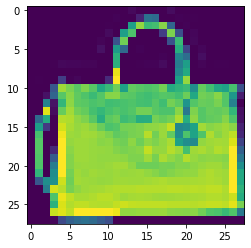

In [45]:
test_image = x_test[30]
plt.imshow(test_image)
plt.show()

In [46]:
test_image_pred = model_ann.predict(test_image.reshape(1,28,28,1))
test_image_pred = np.argmax(test_image_pred, axis=1)

print(f'Predicted Value for above Image is {test_image_pred[0]} & it is image of {class_names[test_image_pred[0]]}')

1/1 [==============================] - 0s 309ms/step
Predicted Value for above Image is 8 & it is image of Bag


# 7. Intermediate result  - Score: 1 mark

1. [Plot the training and validation accuracy history.](#Plot-of-Training-&-Validation-Accuracy-History)
2. [Plot the training and validation loss history.](#Plot-of-Training-&-Validation-Loss-History)
3. [Report the testing accuracy and loss.](#Report-of-Testing-Accuracy-and-Loss)
4. [Show Confusion Matrix for testing dataset.](#Display-of-Confusion-Matrix-for-Testing-Dataset)
5. [Report values for preformance study metrics like accuracy, precision, recall, F1 Score.](#Report-values-for-preformance-study-metrics-like-accuracy,-precision,-recall,-F1-Score)


<h4>All below results are received after fitting with simple ANN Model (model_ann) as defined in section 4.2</h4>

In [47]:
print(f'Summary of loss & Accuracy of Model \n\n {loss}')

Summary of loss & Accuracy of Model 

         loss  accuracy  val_loss  val_accuracy
0   2.618405  0.553767  1.315434        0.7754
1   1.178993  0.799200  1.103133        0.8129
2   1.043769  0.827550  1.034310        0.8217
3   0.969916  0.837733  0.965990        0.8300
4   0.920461  0.844000  0.931585        0.8262
5   0.885158  0.846483  0.899631        0.8345
6   0.852698  0.850700  0.876574        0.8388
7   0.832185  0.851317  0.845177        0.8389
8   0.817361  0.850350  0.840940        0.8359
9   0.798132  0.854633  0.826670        0.8383
10  0.784728  0.854617  0.803228        0.8446
11  0.773136  0.854150  0.803726        0.8408
12  0.758626  0.859233  0.783517        0.8448
13  0.746150  0.857467  0.815824        0.8298
14  0.745751  0.856633  0.778766        0.8409
15  0.737575  0.855900  0.762295        0.8445
16  0.724828  0.860783  0.760831        0.8454
17  0.715861  0.861467  0.741962        0.8462
18  0.709401  0.862767  0.746078        0.8500
19  0.707800  0.86006

<h4>Plot of Training & Validation Accuracy History</h4>

<AxesSubplot:>

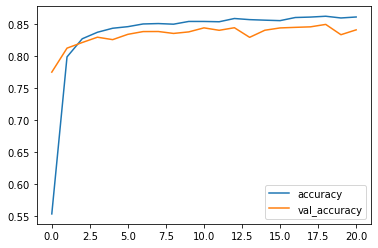

In [48]:
loss[['accuracy','val_accuracy']].plot()

<h4>Plot of Training & Validation Loss History</h4>

<AxesSubplot:>

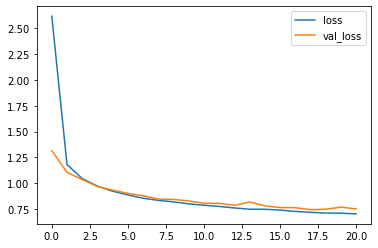

In [49]:
loss[['loss','val_loss']].plot()

<h4>Report of Testing Accuracy and Loss</h4>

In [50]:
print(model_ann.metrics_names)
print(model_ann.evaluate(x=x_test, y=y_test_cat, verbose = 0))

['loss', 'accuracy']
[0.7492848038673401, 0.8414999842643738]


<h4>Display of Confusion Matrix for Testing Dataset</h4>

In [51]:
y_test_predict = model_ann.predict(x=x_test, verbose=0)
y_test_predict = np.argmax(y_test_predict, axis=1)

In [52]:
print(confusion_matrix(y_true=y_test, y_pred=y_test_predict))

[[864   0   8  75   4   2  36   1  10   0]
 [  1 952   1  41   1   1   1   0   1   1]
 [ 23   0 630  28 231   1  83   0   4   0]
 [ 33   9   2 911  19   1  24   0   1   0]
 [  0   7  46  63 820   0  63   0   1   0]
 [  0   0   1   0   0 918   0  39   3  39]
 [227   2  94  62 112   0 492   0  11   0]
 [  0   0   0   0   0  25   0 920   0  55]
 [ 13   0  17   7   2   8   8   7 938   0]
 [  0   0   0   0   0   6   0  23   1 970]]


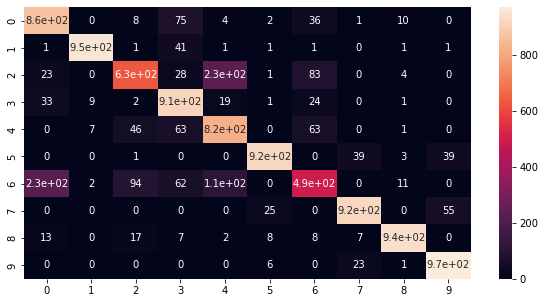

In [53]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_test_predict), annot=True)
plt.show()

<h4>Report values for preformance study metrics like accuracy, precision, recall, F1 Score</h4>

In [54]:
print(classification_report(y_true=y_test, y_pred=y_test_predict))

              precision    recall  f1-score   support

           0       0.74      0.86      0.80      1000
           1       0.98      0.95      0.97      1000
           2       0.79      0.63      0.70      1000
           3       0.77      0.91      0.83      1000
           4       0.69      0.82      0.75      1000
           5       0.95      0.92      0.94      1000
           6       0.70      0.49      0.58      1000
           7       0.93      0.92      0.92      1000
           8       0.97      0.94      0.95      1000
           9       0.91      0.97      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



# 8. Model architecture - Score: 1 mark


Modify the architecture designed in section 4.1 

1. [by decreasing one layer](#ANN-Model-Modification-with-one-less-Hidden-Layer)
2. [by increasing one layer](#ANN-Model-Modification-with-one-extra-Hidden-Layer)

For example, if the architecture in 4.1 has 5 layers, then 8.1 should have 4 layers and 8.2 should have 6 layers.

[Plot the comparison of the training and validation accuracy of the three architecures (4.1, 8.1 and 8.2)](#Plot-Comparison-of-Training-and-Validation-Accuracy-of-3-architecures-(4.1,-8.1,-8.2))



<h4>ANN Model Modification with one less Hidden Layer</h4>

Model 4.1 has total 6 layers (excluding input layer) inlcuding 5 hidden layeres. <br>
So, Model 8.1 should have total 5(=6-1) layers inlcuding 4(=5-1) hidden layeres. 

In [55]:
model_ann_minus = ANN_Creation(x_train=x_train, y_train_cat=y_train_cat, no_hidden_layer=4, dropout_rate=0.0)

In [56]:
model_ann_minus.compile(optimizer='adam',
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

In [57]:
model_ann_minus.fit(x=x_train, 
              y=y_train_cat,
              epochs=100, 
              batch_size=200,
              validation_data=(x_test, y_test_cat), 
              verbose=2, 
              callbacks=[early_stop]
             )

Epoch 1/100
300/300 - 3s - loss: 2.2691 - accuracy: 0.7094 - val_loss: 1.2510 - val_accuracy: 0.8137 - 3s/epoch - 9ms/step
Epoch 2/100
300/300 - 1s - loss: 1.1053 - accuracy: 0.8346 - val_loss: 1.0428 - val_accuracy: 0.8329 - 1000ms/epoch - 3ms/step
Epoch 3/100
300/300 - 1s - loss: 0.9770 - accuracy: 0.8461 - val_loss: 0.9660 - val_accuracy: 0.8339 - 1s/epoch - 4ms/step
Epoch 4/100
300/300 - 1s - loss: 0.9108 - accuracy: 0.8473 - val_loss: 0.9056 - val_accuracy: 0.8392 - 1s/epoch - 4ms/step
Epoch 5/100
300/300 - 1s - loss: 0.8623 - accuracy: 0.8521 - val_loss: 0.8837 - val_accuracy: 0.8369 - 1s/epoch - 5ms/step
Epoch 6/100
300/300 - 1s - loss: 0.8276 - accuracy: 0.8551 - val_loss: 0.8451 - val_accuracy: 0.8442 - 1s/epoch - 5ms/step
Epoch 7/100
300/300 - 1s - loss: 0.8035 - accuracy: 0.8576 - val_loss: 0.8460 - val_accuracy: 0.8384 - 1s/epoch - 4ms/step
Epoch 8/100
300/300 - 1s - loss: 0.7831 - accuracy: 0.8595 - val_loss: 0.8147 - val_accuracy: 0.8408 - 1s/epoch - 4ms/step
Epoch 9/100


In [58]:
loss_minus = pd.DataFrame(model_ann_minus.history.history)
print(loss_minus)
# loss_minus[['accuracy','val_accuracy']].plot()
# loss_minus[['loss','val_loss']].plot()
# plt.show()

        loss  accuracy  val_loss  val_accuracy
0   2.269139  0.709417  1.250991        0.8137
1   1.105285  0.834550  1.042803        0.8329
2   0.977042  0.846067  0.965973        0.8339
3   0.910842  0.847300  0.905600        0.8392
4   0.862343  0.852133  0.883652        0.8369
5   0.827649  0.855117  0.845095        0.8442
6   0.803523  0.857617  0.846001        0.8384
7   0.783134  0.859467  0.814734        0.8408
8   0.764923  0.859117  0.784988        0.8498
9   0.752470  0.860983  0.776065        0.8487
10  0.735977  0.859883  0.782408        0.8445
11  0.725892  0.862950  0.742974        0.8489
12  0.713320  0.862917  0.764695        0.8402
13  0.701770  0.865583  0.731960        0.8536
14  0.696275  0.865317  0.745292        0.8416
15  0.687358  0.866650  0.715112        0.8522
16  0.680322  0.865867  0.707924        0.8557
17  0.675316  0.865817  0.709640        0.8522
18  0.669681  0.865517  0.730231        0.8376
19  0.663387  0.866150  0.699382        0.8502
20  0.659998 

<h4>ANN Model Modification with one extra Hidden Layer</h4>


Model 4.1 has total 6 layers (excluding input layer) inlcuding 5 hidden layeres. <br>
So, Model 8.2 should have total 7(=6+1) layers inlcuding 6(=5+1) hidden layeres. 

In [59]:
model_ann_plus= ANN_Creation(x_train=x_train, y_train_cat=y_train_cat, no_hidden_layer=6, dropout_rate=0.0)

In [60]:
model_ann_plus.compile(optimizer='adam',
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

In [61]:
model_ann_plus.fit(x=x_train, 
              y=y_train_cat,
              epochs=100, 
              batch_size=200,
              validation_data=(x_test, y_test_cat), 
              verbose=2, 
              callbacks=[early_stop]
             )

Epoch 1/100
300/300 - 4s - loss: 2.9347 - accuracy: 0.4927 - val_loss: 1.4219 - val_accuracy: 0.6740 - 4s/epoch - 12ms/step
Epoch 2/100
300/300 - 1s - loss: 1.2948 - accuracy: 0.7534 - val_loss: 1.2221 - val_accuracy: 0.7616 - 1s/epoch - 5ms/step
Epoch 3/100
300/300 - 2s - loss: 1.1644 - accuracy: 0.7902 - val_loss: 1.1580 - val_accuracy: 0.7796 - 2s/epoch - 7ms/step
Epoch 4/100
300/300 - 2s - loss: 1.0993 - accuracy: 0.7990 - val_loss: 1.1037 - val_accuracy: 0.7900 - 2s/epoch - 7ms/step
Epoch 5/100
300/300 - 2s - loss: 1.0474 - accuracy: 0.8098 - val_loss: 1.0615 - val_accuracy: 0.7895 - 2s/epoch - 6ms/step
Epoch 6/100
300/300 - 2s - loss: 1.0145 - accuracy: 0.8144 - val_loss: 1.0115 - val_accuracy: 0.8041 - 2s/epoch - 6ms/step
Epoch 7/100
300/300 - 2s - loss: 0.9757 - accuracy: 0.8219 - val_loss: 0.9888 - val_accuracy: 0.8145 - 2s/epoch - 6ms/step
Epoch 8/100
300/300 - 2s - loss: 0.9588 - accuracy: 0.8253 - val_loss: 0.9963 - val_accuracy: 0.7935 - 2s/epoch - 5ms/step
Epoch 9/100
300

In [62]:
loss_plus = pd.DataFrame(model_ann_plus.history.history)
print(loss_plus)
# loss_plus[['accuracy','val_accuracy']].plot()
# loss_plus[['loss','val_loss']].plot()
# plt.show()

        loss  accuracy  val_loss  val_accuracy
0   2.934680  0.492700  1.421913        0.6740
1   1.294828  0.753367  1.222052        0.7616
2   1.164430  0.790183  1.158032        0.7796
3   1.099261  0.798983  1.103655        0.7900
4   1.047401  0.809800  1.061520        0.7895
5   1.014464  0.814383  1.011502        0.8041
6   0.975660  0.821933  0.988824        0.8145
7   0.958770  0.825267  0.996264        0.7935
8   0.941614  0.827133  0.942322        0.8243
9   0.918684  0.829317  0.928168        0.8214
10  0.900673  0.832267  0.922366        0.8196
11  0.891496  0.833033  0.921072        0.8175
12  0.877917  0.834050  0.901377        0.8211
13  0.867388  0.834933  0.894441        0.8167
14  0.856000  0.834700  0.905385        0.8183
15  0.849318  0.835183  0.862427        0.8254
16  0.843634  0.833733  0.901062        0.8143
17  0.834331  0.837567  0.850274        0.8258
18  0.824073  0.838667  0.866934        0.8203
19  0.825188  0.835150  0.843547        0.8224
20  0.820764 

<h4>Plot Comparison of Training and Validation Accuracy of 3 architecures (4.1, 8.1, 8.2)</h4>

In [63]:
loss['index']=loss.index
loss_minus['index']=loss_minus.index
loss_plus['index']=loss_plus.index

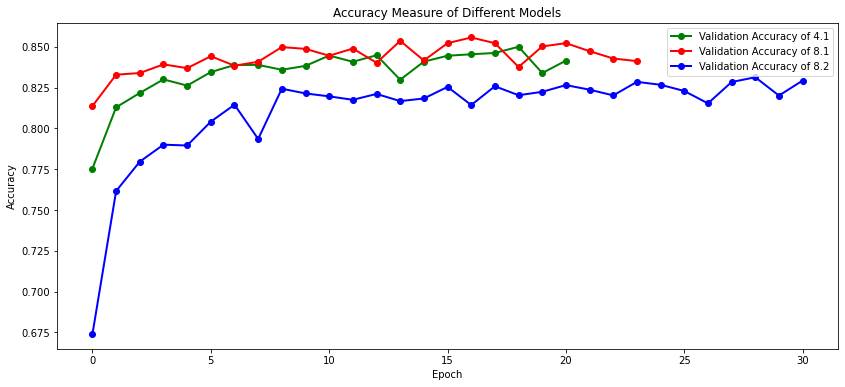

In [64]:
plt.figure(figsize = (14, 6))
plt.plot(loss.iloc[:,4],loss.iloc[:,3], 'go-', label='Validation Accuracy of 4.1', linewidth=2)
plt.plot(loss_minus.iloc[:,4],loss_minus.iloc[:,3], 'ro-', label='Validation Accuracy of 8.1', linewidth=2)
plt.plot(loss_plus.iloc[:,4],loss_plus.iloc[:,3], 'bo-', label='Validation Accuracy of 8.2', linewidth=2)

plt.title('Accuracy Measure of Different Models')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [65]:
am_max_4_1 = max(loss.iloc[:,1])
am_max_8_1 = max(loss_minus.iloc[:,1])
am_max_8_2 = max(loss_plus.iloc[:,1])
am_max = max(am_max_4_1,am_max_8_1, am_max_8_2)

if  am_max == am_max_4_1:
    print(f'Model 4.1 is having highest Validation Accuracy {am_max_4_1}')
elif am_max == am_max_8_1:
    print(f'Model 8.1 is having highest Validation Accuracy {am_max_8_1}')
else:
    print(f'Model 8.2 is having highest Validation Accuracy {am_max_8_2}')

Model 8.1 is having highest Validation Accuracy 0.8687999844551086


In [66]:
# am_max_4_1, am_max_8_1, am_max_8_2

# 9. Regularisations - Score: 1 mark

Modify the architecture designed in section 4.1

1. [Dropout of ratio 0.25](#ANN-Model-Modification-with-Dropout-Rate)
2. [Dropout of ratio 0.25 with L2 regulariser with factor 1e−04.](#ANN-Model-Modification-with-Dropout-Rate-&-L2-Regulariser)

[Plot the comparison of the training and validation accuracy of the three (4.1, 9.1 and 9.2)](#Plot-Comparison-of-Training-&-Validation-Accuracy-of-3-Models-(4.1,-9.1-and-9.2))



<h4>ANN Model Modification with Dropout Rate</h4>

In [67]:
model_ann_do = ANN_Creation(x_train=x_train, y_train_cat=y_train_cat, no_hidden_layer=5, dropout_rate=0.25)

In [68]:
model_ann_do.compile(optimizer='adam',
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

In [69]:
model_ann_do.fit(x=x_train, 
              y=y_train_cat,
              epochs=100, 
              batch_size=200,
              validation_data=(x_test, y_test_cat), 
              verbose=2, 
              callbacks=[early_stop]
             )

Epoch 1/100
300/300 - 4s - loss: 3.2510 - accuracy: 0.2088 - val_loss: 1.8625 - val_accuracy: 0.3056 - 4s/epoch - 14ms/step
Epoch 2/100
300/300 - 2s - loss: 1.8294 - accuracy: 0.3158 - val_loss: 1.7448 - val_accuracy: 0.3256 - 2s/epoch - 7ms/step
Epoch 3/100
300/300 - 2s - loss: 1.7421 - accuracy: 0.3487 - val_loss: 1.6501 - val_accuracy: 0.3833 - 2s/epoch - 7ms/step
Epoch 4/100
300/300 - 2s - loss: 1.6999 - accuracy: 0.3596 - val_loss: 1.6151 - val_accuracy: 0.3878 - 2s/epoch - 7ms/step
Epoch 5/100
300/300 - 2s - loss: 1.6658 - accuracy: 0.3799 - val_loss: 1.5743 - val_accuracy: 0.4452 - 2s/epoch - 8ms/step
Epoch 6/100
300/300 - 2s - loss: 1.5885 - accuracy: 0.4460 - val_loss: 1.4166 - val_accuracy: 0.5308 - 2s/epoch - 8ms/step
Epoch 7/100
300/300 - 2s - loss: 1.4828 - accuracy: 0.4852 - val_loss: 1.3198 - val_accuracy: 0.5646 - 2s/epoch - 8ms/step
Epoch 8/100
300/300 - 2s - loss: 1.3948 - accuracy: 0.5341 - val_loss: 1.2630 - val_accuracy: 0.5994 - 2s/epoch - 8ms/step
Epoch 9/100
300

In [70]:
loss_do = pd.DataFrame(model_ann_do.history.history)
print(loss_do)

        loss  accuracy  val_loss  val_accuracy
0   3.251030  0.208833  1.862507        0.3056
1   1.829400  0.315750  1.744844        0.3256
2   1.742092  0.348750  1.650063        0.3833
3   1.699884  0.359633  1.615053        0.3878
4   1.665833  0.379900  1.574319        0.4452
5   1.588468  0.446017  1.416636        0.5308
6   1.482838  0.485183  1.319794        0.5646
7   1.394753  0.534083  1.262954        0.5994
8   1.343441  0.573883  1.188038        0.7050
9   1.310815  0.603350  1.177901        0.6929
10  1.277355  0.621767  1.137227        0.7003
11  1.242013  0.632117  1.117228        0.7035
12  1.222411  0.639267  1.100646        0.7008
13  1.209540  0.646183  1.077341        0.7086
14  1.194629  0.652867  1.066182        0.7088
15  1.183008  0.657500  1.052691        0.7124
16  1.168603  0.664950  1.029799        0.7236
17  1.164387  0.665283  1.023564        0.7219
18  1.149633  0.671317  0.999238        0.7263
19  1.135117  0.677433  0.991216        0.7245
20  1.121645 

<h4>ANN Model Modification with Dropout Rate & L2 Regulariser</h4>

Dropout of ratio 0.25 with L2 regulariser with factor 1e−04.

In [71]:
model_ann_dor = ANN_Creation(x_train=x_train, y_train_cat=y_train_cat, 
                             no_hidden_layer=5, dropout_rate=0.25, kernel_regularizer= 0.0001)

In [72]:
model_ann_dor.compile(optimizer='adam',
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

In [73]:
model_ann_dor.fit(x=x_train, 
              y=y_train_cat,
              epochs=100, 
              batch_size=200,
              validation_data=(x_test, y_test_cat), 
              verbose=2, 
              callbacks=[early_stop]
             )

Epoch 1/100
300/300 - 5s - loss: 1.9661 - accuracy: 0.2959 - val_loss: 1.4440 - val_accuracy: 0.4644 - 5s/epoch - 17ms/step
Epoch 2/100
300/300 - 2s - loss: 1.4626 - accuracy: 0.4527 - val_loss: 1.3237 - val_accuracy: 0.4776 - 2s/epoch - 7ms/step
Epoch 3/100
300/300 - 2s - loss: 1.3469 - accuracy: 0.4923 - val_loss: 1.1076 - val_accuracy: 0.5912 - 2s/epoch - 7ms/step
Epoch 4/100
300/300 - 2s - loss: 1.1757 - accuracy: 0.5678 - val_loss: 0.9809 - val_accuracy: 0.6459 - 2s/epoch - 7ms/step
Epoch 5/100
300/300 - 2s - loss: 1.0701 - accuracy: 0.6155 - val_loss: 0.9185 - val_accuracy: 0.6495 - 2s/epoch - 8ms/step
Epoch 6/100
300/300 - 3s - loss: 1.0280 - accuracy: 0.6272 - val_loss: 0.8976 - val_accuracy: 0.6521 - 3s/epoch - 9ms/step
Epoch 7/100
300/300 - 3s - loss: 1.0041 - accuracy: 0.6310 - val_loss: 0.8912 - val_accuracy: 0.6534 - 3s/epoch - 8ms/step
Epoch 8/100
300/300 - 4s - loss: 0.9883 - accuracy: 0.6340 - val_loss: 0.8711 - val_accuracy: 0.6620 - 4s/epoch - 12ms/step
Epoch 9/100
30

In [74]:
loss_dor = pd.DataFrame(model_ann_dor.history.history)
print(loss_dor)

        loss  accuracy  val_loss  val_accuracy
0   1.966149  0.295933  1.443979        0.4644
1   1.462604  0.452667  1.323738        0.4776
2   1.346937  0.492333  1.107554        0.5912
3   1.175729  0.567850  0.980913        0.6459
4   1.070124  0.615517  0.918539        0.6495
5   1.027961  0.627200  0.897619        0.6521
6   1.004148  0.630967  0.891163        0.6534
7   0.988339  0.634000  0.871088        0.6620
8   0.973629  0.634217  0.856609        0.6628
9   0.965431  0.637317  0.849588        0.6612
10  0.960788  0.636283  0.859457        0.6625
11  0.946571  0.642750  0.853657        0.6589
12  0.941262  0.643617  0.849956        0.6610


<h4>Plot Comparison of Training & Validation Accuracy of 3 Models (4.1, 9.1 and 9.2)</h4>

In [75]:
# loss['index']=loss.index
loss_do['index']=loss_do.index
loss_dor['index']=loss_dor.index

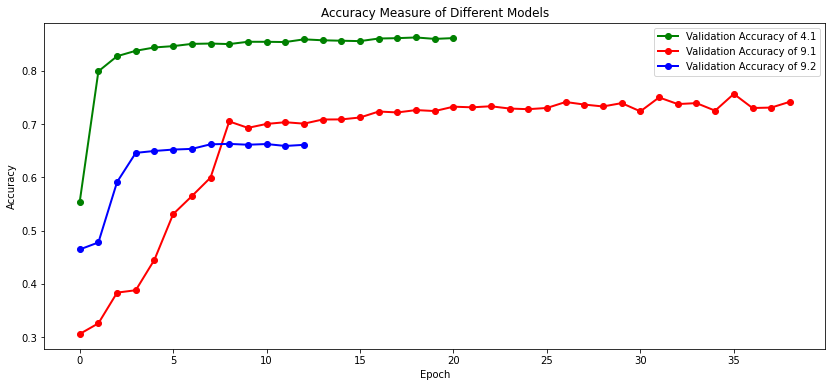

In [76]:
plt.figure(figsize = (14, 6))
plt.plot(loss.iloc[:,4],loss.iloc[:,1], 'go-', label='Validation Accuracy of 4.1', linewidth=2)
plt.plot(loss_do.iloc[:,4],loss_do.iloc[:,3], 'ro-', label='Validation Accuracy of 9.1', linewidth=2)
plt.plot(loss_dor.iloc[:,4],loss_dor.iloc[:,3], 'bo-', label='Validation Accuracy of 9.2', linewidth=2)

plt.title('Accuracy Measure of Different Models')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [77]:
am_max_4_1 = max(loss.iloc[:,1])
am_max_9_1 = max(loss_do.iloc[:,1])
am_max_9_2 = max(loss_dor.iloc[:,1])
am_max = max(am_max_4_1,am_max_9_1, am_max_9_2)

if  am_max == am_max_4_1:
    print(f'Model 4.1 is having highest Validation Accuracy {am_max_4_1}')
elif am_max == am_max_9_1:
    print(f'Model 9.1 is having highest Validation Accuracy {am_max_9_1}')
else:
    print(f'Model 9.2 is having highest Validation Accuracy {am_max_9_2}')

Model 4.1 is having highest Validation Accuracy 0.862766683101654


In [78]:
# am_max_4_1, am_max_9_1, am_max_9_2

# 10. Optimisers -Score: 1 mark

Modify the code written in section 5.2

1. [RMSProp with your choice of hyper parameters](#ANN-Model-Modification-with-RMSProp-Optimizer)
2. [Adam with your choice of hyper parameters](#ANN-Model-Modification-with-ADAM-Optimizer)

[Plot the comparison of the training and validation accuracy of the three (5.2, 10.1 and 10.2)](#Plot-Comparison-of-Training-&-Validation-Accuracy-of-three-Models(5.2,-10.1-and-10.2))


<h4>ANN Model Modification with RMSProp Optimizer</h4>

In [79]:
# model_ann_rmsprop = ANN_Creation(x_train=x_train, y_train_cat=y_train_cat)

# model_ann_rmsprop.compile(optimizer='rmsprop',
#                   loss='categorical_crossentropy', 
#                   metrics=['accuracy'])

# model_ann_rmsprop.fit(x=x_train, 
#               y=y_train_cat,
#               epochs=100, 
#               batch_size=200,
#               validation_data=(x_test, y_test_cat), 
#               verbose=2, 
#               callbacks=[early_stop]
#              )

# loss_rmsprop = pd.DataFrame(model_ann_rmsprop.history.history)
# print(loss_rmsprop)
# loss_rmsprop[['accuracy','val_accuracy']].plot()
# loss_rmsprop[['loss','val_loss']].plot()
# plt.show()


In [80]:
model_ann_rmsprop, loss_cv_rmsprop = ann_with_cross_val(x_train, y_train, no_hiddenlayer=5, dropout_rate=0.0, k_fold=5, 
                                                        optimizers ='rmsprop', loss_val='categorical_crossentropy', 
                                                        metrics_val='accuracy', display_time = 'X')

Fold 1
Time taken for this fold: 68.14103055000305 seconds
Fold 2
Time taken for this fold: 79.2352843284607 seconds
Fold 3
Time taken for this fold: 24.53597617149353 seconds
Fold 4
Time taken for this fold: 23.60894250869751 seconds
Fold 5
Time taken for this fold: 23.830509424209595 seconds
Total time taken for training across all folds: 219.35174298286438 seconds


In [81]:
print(loss_cv_rmsprop)

        loss  accuracy  val_loss  val_accuracy
0   0.889350  0.808333  0.772192      0.833050
1   0.773859  0.824833  0.797945      0.815767
2   0.755391  0.827579  0.735679      0.832483
3   0.743361  0.828058  0.724878      0.834583
4   0.788583  0.827021  0.779320      0.824083
5   0.780268  0.826917  0.761831      0.832958
6   0.769808  0.827229  0.739769      0.832792
7   0.761599  0.828042  0.749441      0.834417
8   0.753832  0.829844  0.733986      0.841208
9   0.748598  0.828760  0.755075      0.824667
10  0.743308  0.829208  0.819263      0.802333
11  0.711527  0.831375  0.721827      0.836750


<h4>ANN Model Modification with ADAM Optimizer</h4>

In [82]:
# model_ann_adam = ANN_Creation(x_train=x_train, y_train_cat=y_train_cat) 

# model_ann_adam.compile(optimizer='adam',
#                   loss='categorical_crossentropy', 
#                   metrics=['accuracy'])

# model_ann_adam.fit(x=x_train, 
#               y=y_train_cat,
#               epochs=100, 
#               batch_size=200,
#               validation_data=(x_test, y_test_cat), 
#               verbose=2, 
#               callbacks=[early_stop]
#              )

# loss_adam = pd.DataFrame(model_ann_adam.history.history)
# print(loss_adam)
# loss_adam[['accuracy','val_accuracy']].plot()
# loss_adam[['loss','val_loss']].plot()
# plt.show()

In [83]:
model_ann_adam, loss_cv_adam = ann_with_cross_val(x_train, y_train, no_hiddenlayer=5, dropout_rate=0.0, 
                                                  k_fold=5, optimizers ='adam', loss_val='categorical_crossentropy', 
                                                  metrics_val='accuracy', display_time = 'X')

Fold 1
Time taken for this fold: 134.83870553970337 seconds
Fold 2
Time taken for this fold: 25.279141902923584 seconds
Fold 3
Time taken for this fold: 33.44685888290405 seconds
Fold 4
Time taken for this fold: 29.31174087524414 seconds
Fold 5
Time taken for this fold: 38.655911922454834 seconds
Total time taken for training across all folds: 261.53235912323 seconds


In [84]:
print(loss_cv_adam)

        loss  accuracy  val_loss  val_accuracy
0   0.886387  0.806158  0.775917      0.825683
1   0.774862  0.825267  0.760833      0.830900
2   0.755384  0.830142  0.737135      0.835233
3   0.743685  0.830542  0.769370      0.817917
4   0.784840  0.820719  0.752545      0.832958
5   0.772942  0.825365  0.764875      0.834125
6   0.841724  0.819146  0.811839      0.832417
7   0.810833  0.826813  0.788418      0.839083
8   0.792932  0.832000  0.790184      0.834333
9   0.787482  0.832542  0.760395      0.845417
10  0.780026  0.833083  0.754167      0.844417
11  0.766350  0.834604  0.762988      0.841833
12  0.762475  0.835708  0.780772      0.823583
13  0.754613  0.836875  0.718709      0.849417
14  0.747999  0.838000  0.741673      0.843167
15  0.743299  0.836771  0.739873      0.842917
16  0.739265  0.836438  0.705390      0.847083
17  0.736196  0.837646  0.725935      0.838250
18  0.730194  0.839042  0.763796      0.822750
19  0.727570  0.837750  0.757759      0.823417


<h4>Plot Comparison of Training & Validation Accuracy of three Models(5.2, 10.1 and 10.2)</h4>

In [85]:
loss_cv_sgd['index']=loss_cv_sgd.index
loss_cv_rmsprop['index']=loss_cv_rmsprop.index
loss_cv_adam['index']=loss_cv_adam.index

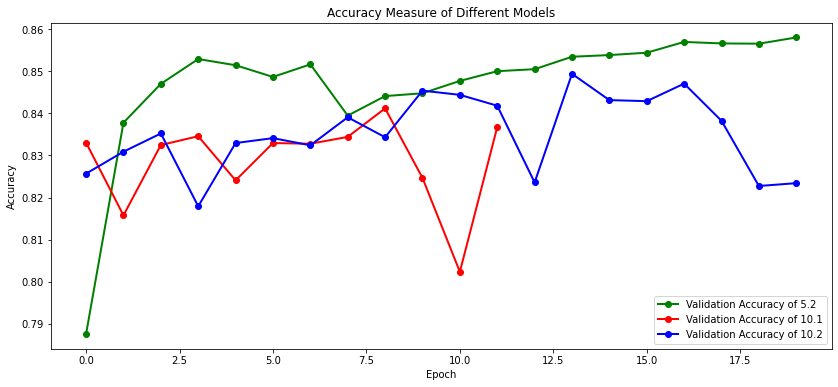

In [86]:
plt.figure(figsize = (14, 6))
plt.plot(loss_cv_sgd.iloc[:,4],loss_cv_sgd.iloc[:,1], 'go-', label='Validation Accuracy of 5.2', linewidth=2)
plt.plot(loss_cv_rmsprop.iloc[:,4],loss_cv_rmsprop.iloc[:,3], 'ro-', label='Validation Accuracy of 10.1', linewidth=2)
plt.plot(loss_cv_adam.iloc[:,4],loss_cv_adam.iloc[:,3], 'bo-', label='Validation Accuracy of 10.2', linewidth=2)

plt.title('Accuracy Measure of Different Models')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [87]:
am_max_5_2 = max(loss_cv_sgd.iloc[:,1])
am_max_10_1 = max(loss_cv_rmsprop.iloc[:,1])
am_max_10_2 = max(loss_cv_adam.iloc[:,1])
am_max = max(am_max_5_2,am_max_10_1, am_max_10_2)

if  am_max == am_max_5_2:
    print(f'Model 5.2 is having highest Validation Accuracy {am_max_5_2}')
elif am_max == am_max_8_1:
    print(f'Model 10.1 is having highest Validation Accuracy {am_max_10_1}')
else:
    print(f'Model 10.2 is having highest Validation Accuracy {am_max_10_2}')

Model 5.2 is having highest Validation Accuracy 0.8580625057220459


# 11. Conclusion - Score: 1 mark

Comparing the sections 4.1, 5.2, 8, 9, and 10, present your observations on which model or architecture or regualiser or optimiser perfomed better.


Below are designed models:

| Model |        Description                                         |
|:-----:|------------------------------------------------------------|
|  4.1  | Simple ANN with ADAM optimizer & 5 hidden Layer            |
|  5.2  | ANN with SGD optimozer (cross-validation)                  |
|  8.1  | Simple ANN with ADAM optimizer & 4 hidden Layer            |
|  8.2  | Simple ANN with ADAM optimizer & 6 hidden Layer            |
|  9.1  | Simple ANN with Dropout Ratio 0.25                         |
|  9.2  | Simple ANN with Dropout Ratio 0.25 & L2 regulariser 0.0001 |
|  10.1 | ANN with RMSprop optimozer (cross-validation)              |
|  10.2 | ANN with ADAM optimozer (cross-validation)                 |

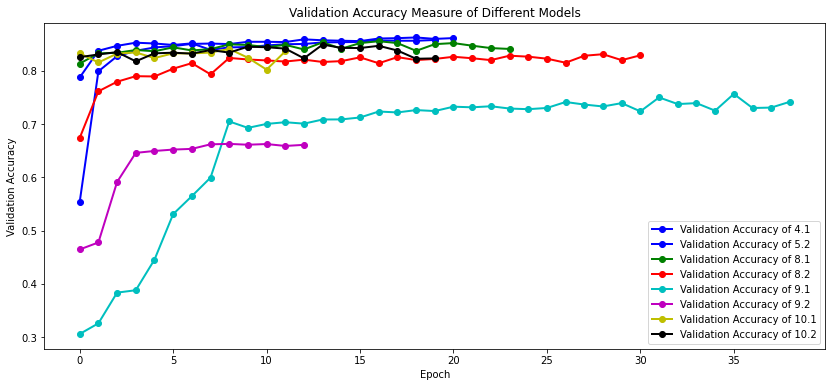

In [88]:
plt.figure(figsize = (14, 6))
plt.plot(loss.iloc[:,4],loss.iloc[:,1], color='blue', marker='o', label='Validation Accuracy of 4.1', linewidth=2)
plt.plot(loss_cv_sgd.iloc[:,4],loss_cv_sgd.iloc[:,1], color='blue', marker='o', label='Validation Accuracy of 5.2', linewidth=2)
plt.plot(loss_minus.iloc[:,4],loss_minus.iloc[:,3], 'go-', label='Validation Accuracy of 8.1', linewidth=2)
plt.plot(loss_plus.iloc[:,4],loss_plus.iloc[:,3], 'ro-', label='Validation Accuracy of 8.2', linewidth=2)
plt.plot(loss_do.iloc[:,4],loss_do.iloc[:,3], 'co-', label='Validation Accuracy of 9.1', linewidth=2)
plt.plot(loss_dor.iloc[:,4],loss_dor.iloc[:,3], 'mo-', label='Validation Accuracy of 9.2', linewidth=2)
plt.plot(loss_cv_rmsprop.iloc[:,4],loss_cv_rmsprop.iloc[:,3], 'yo-', label='Validation Accuracy of 10.1', linewidth=2)
plt.plot(loss_cv_adam.iloc[:,4],loss_cv_adam.iloc[:,3], 'ko-', label='Validation Accuracy of 10.2', linewidth=2)

plt.title('Validation Accuracy Measure of Different Models')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()

plt.show()

In [89]:
am_max = max(am_max_4_1, am_max_5_2, am_max_8_1, am_max_8_2, am_max_9_1, am_max_9_2, am_max_10_1, am_max_10_2)

if  am_max == am_max_4_1:
    print(f'Model 4.1 is having highest Validation Accuracy {am_max_4_1}')
elif  am_max == am_max_5_2:
    print(f'Model 5.2 is having highest Validation Accuracy {am_max_5_2}')
elif am_max == am_max_8_1:
    print(f'Model 8.1 is having highest Validation Accuracy {am_max_8_1}')
elif am_max == am_max_8_2:
    print(f'Model 8.2 is having highest Validation Accuracy {am_max_8_2}')
elif am_max == am_max_9_1:
    print(f'Model 9.1 is having highest Validation Accuracy {am_max_9_1}')
elif am_max == am_max_9_2:
    print(f'Model 9.2 is having highest Validation Accuracy {am_max_9_2}')
elif am_max == am_max_10_1:
    print(f'Model 10.1 is having highest Validation Accuracy {am_max_10_1}')
elif am_max == am_max_10_2:
    print(f'Model 10.2 is having highest Validation Accuracy {am_max_10_2}')    

Model 8.1 is having highest Validation Accuracy 0.8687999844551086


<h4>Comparison of Models for Loss & Accuracy wrt Testset</h4>

In [90]:
score_ann = model_ann.evaluate(x=x_test, y=y_test_cat, verbose = 0)
score_sgd = model_ann_sgd.evaluate(x=x_test, y=y_test_cat, verbose = 0)
score_minus = model_ann_minus.evaluate(x=x_test, y=y_test_cat, verbose = 0)
score_plus = model_ann_plus.evaluate(x=x_test, y=y_test_cat, verbose = 0)
score_do = model_ann_do.evaluate(x=x_test, y=y_test_cat, verbose = 0)
score_dor = model_ann_dor.evaluate(x=x_test, y=y_test_cat, verbose = 0)
score_rmsprop = model_ann_rmsprop.evaluate(x=x_test, y=y_test_cat, verbose = 0)
score_adam = model_ann_adam.evaluate(x=x_test, y=y_test_cat, verbose = 0)

In [91]:
scores_loss = [score_ann[0], score_sgd[0], score_minus[0], score_plus[0], score_do[0], score_dor[0], 
               score_rmsprop[0], score_adam[0]]

In [92]:
models = ['4.1', '5.2', '8.1', '8.2', '9.1', '9.2', '10.1', '10.2']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


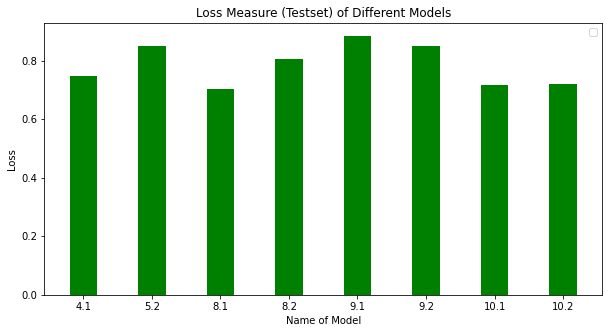

In [93]:
plt.figure(figsize = (10, 5))
plt.bar(models, scores_loss, color ='green', width = 0.4)

# for i, v in enumerate(scores):
#     plt.text(v, i, str(v),
#             color = 'blue', fontweight = 'bold')

plt.title('Loss Measure (Testset) of Different Models')
plt.xlabel('Name of Model')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [94]:
print(f'Lowest Loss Value of All Models for Testing Set = {min(scores_loss)}')

Lowest Loss Value of All Models for Testing Set = 0.7035643458366394


In [95]:
scores_accuracy = [score_ann[1], score_sgd[1], score_minus[1], score_plus[1], 
                   score_do[1], score_dor[1], score_rmsprop[1], score_adam[1]]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


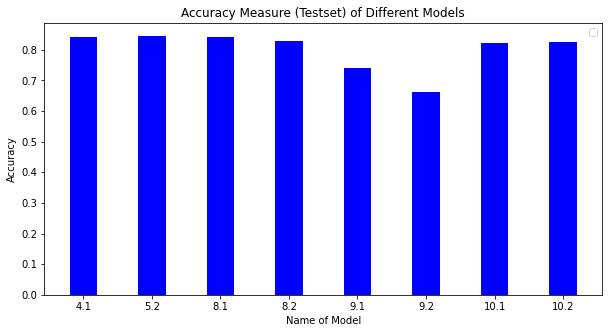

In [96]:
plt.figure(figsize = (10, 5))
plt.bar(models, scores_accuracy, color ='blue', width = 0.4)

plt.title('Accuracy Measure (Testset) of Different Models')
plt.xlabel('Name of Model')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [97]:
print(f'Highest Accuracy Value of All Models for Testing Set = {max(scores_accuracy)}')

Highest Accuracy Value of All Models for Testing Set = 0.8450000286102295


<h1>Alternative Way of Hyper-Parameter Tuning via KerasTuner</h1>

- KerasTuner is an easy-to-use, scalable hyperparameter optimization framework that solves pain points of hyperparameter search.
- Search Space can easily be configured with a define-by-run syntax, then leverage one of the available search algorithms to find best hyperparameter values for models. 

In [98]:
def build_model(hp):  # random search passes this hyperparameter() object 
    model = Sequential()
    
    activation = hp.Choice(name = 'activation', values = ['relu', 'tanh', 'sigmoid'], ordered = False, default='relu')
#     dropout = hp.Boolean(name = 'dropout', default = False)
#     learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    no_layer = hp.Int(name = 'no_layer', min_value = 2, max_value = 10)
    no_unit = hp.Int(f'layer_unit', min_value = 32, max_value = 480, step=32, default=32)
    optimizer = hp.Choice(name = 'optimizer', values = ['adam', 'sgd', 'rmsprop'], default='adam')
    
    #Input layer
    model.add(Flatten(input_shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3])))
    
    
    for i in range(no_layer):
        model.add(Dense(no_unit, activation=activation))
#         model.add(Dropout(0.2))


    #Output Layer
    model.add(Dense(units=y_train_cat.shape[1], activation='softmax'))
    
    model.compile(optimizer=optimizer,
#                   loss='binary_crossentropy',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


    return model

In [99]:
LOG_DIR = f"{int(time.time())}"

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # how many model variations to test?
    executions_per_trial=5,  # how many trials per variation? (same model could perform differently)
    directory=LOG_DIR)

In [100]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'sigmoid'], 'ordered': False}
no_layer (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
layer_unit (Int)
{'default': 32, 'conditions': [], 'min_value': 32, 'max_value': 480, 'step': 32, 'sampling': 'linear'}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'sgd', 'rmsprop'], 'ordered': False}


In [101]:
tuner.search(x=x_train, 
              y=y_train_cat,
              epochs=1, 
              batch_size=64,
              validation_data=(x_test, y_test_cat), 
              verbose=2, 
#               callbacks=[early_stop]
             )

Trial 5 Complete [00h 00m 31s]
val_accuracy: 0.8053200006484985

Best val_accuracy So Far: 0.8370199799537659
Total elapsed time: 00h 02m 59s
INFO:tensorflow:Oracle triggered exit


In [102]:
tuner.results_summary()

Results summary
Results in 1689419964\untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
activation: relu
no_layer: 10
layer_unit: 96
optimizer: adam
Score: 0.8370199799537659

Trial 3 summary
Hyperparameters:
activation: sigmoid
no_layer: 4
layer_unit: 320
optimizer: adam
Score: 0.8159600019454956

Trial 1 summary
Hyperparameters:
activation: tanh
no_layer: 6
layer_unit: 256
optimizer: sgd
Score: 0.8143200039863586

Trial 4 summary
Hyperparameters:
activation: tanh
no_layer: 7
layer_unit: 192
optimizer: sgd
Score: 0.8053200006484985

Trial 2 summary
Hyperparameters:
activation: tanh
no_layer: 7
layer_unit: 192
optimizer: rmsprop
Score: 0.7938600063323975


In [103]:
print(tuner.get_best_hyperparameters()[0].values)

{'activation': 'relu', 'no_layer': 10, 'layer_unit': 96, 'optimizer': 'adam'}


In [104]:
best_model = tuner.get_best_models()[0]
print(best_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 96)                75360     
                                                                 
 dense_1 (Dense)             (None, 96)                9312      
                                                                 
 dense_2 (Dense)             (None, 96)                9312      
                                                                 
 dense_3 (Dense)             (None, 96)                9312      
                                                                 
 dense_4 (Dense)             (None, 96)                9312      
                                                                 
 dense_5 (Dense)             (None, 96)                9

In [105]:
best_model.fit(x=x_train, 
              y=y_train_cat,
              epochs=200, 
              batch_size=200,
              validation_data=(x_test, y_test_cat), 
              verbose=2, 
              callbacks=[early_stop]
             )

Epoch 1/200
300/300 - 2s - loss: 0.3687 - accuracy: 0.8655 - val_loss: 0.4013 - val_accuracy: 0.8521 - 2s/epoch - 8ms/step
Epoch 2/200
300/300 - 2s - loss: 0.3413 - accuracy: 0.8755 - val_loss: 0.3717 - val_accuracy: 0.8664 - 2s/epoch - 5ms/step
Epoch 3/200
300/300 - 2s - loss: 0.3265 - accuracy: 0.8811 - val_loss: 0.3632 - val_accuracy: 0.8746 - 2s/epoch - 5ms/step
Epoch 4/200
300/300 - 2s - loss: 0.3111 - accuracy: 0.8860 - val_loss: 0.3947 - val_accuracy: 0.8575 - 2s/epoch - 5ms/step
Epoch 5/200
300/300 - 2s - loss: 0.3000 - accuracy: 0.8895 - val_loss: 0.3561 - val_accuracy: 0.8744 - 2s/epoch - 6ms/step
Epoch 6/200
300/300 - 2s - loss: 0.2838 - accuracy: 0.8944 - val_loss: 0.3473 - val_accuracy: 0.8768 - 2s/epoch - 6ms/step
Epoch 7/200
300/300 - 2s - loss: 0.2738 - accuracy: 0.8986 - val_loss: 0.3487 - val_accuracy: 0.8781 - 2s/epoch - 6ms/step
Epoch 8/200
300/300 - 2s - loss: 0.2704 - accuracy: 0.8997 - val_loss: 0.3455 - val_accuracy: 0.8783 - 2s/epoch - 6ms/step
Epoch 9/200
300/

In [106]:
loss_best = pd.DataFrame(best_model.history.history)

In [107]:
print(loss_best)

        loss  accuracy  val_loss  val_accuracy
0   0.368742  0.865483  0.401318        0.8521
1   0.341279  0.875483  0.371747        0.8664
2   0.326503  0.881100  0.363218        0.8746
3   0.311113  0.886017  0.394743        0.8575
4   0.300035  0.889517  0.356098        0.8744
5   0.283815  0.894383  0.347345        0.8768
6   0.273831  0.898600  0.348678        0.8781
7   0.270389  0.899667  0.345453        0.8783
8   0.263775  0.902833  0.353172        0.8754
9   0.259022  0.904050  0.345643        0.8781
10  0.250822  0.907017  0.352308        0.8768


<AxesSubplot:>

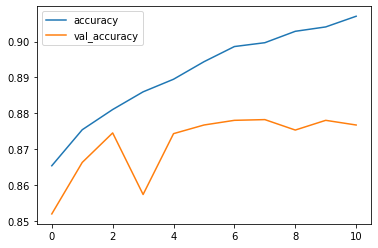

In [108]:
loss_best[['accuracy','val_accuracy']].plot() 

<AxesSubplot:>

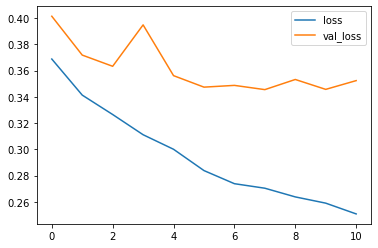

In [109]:
loss_best[['loss','val_loss']].plot()

In [110]:
# print(best_model.metrics_names)
score_best = best_model.evaluate(x=x_test, y=y_test_cat, verbose = 0)

In [111]:
score_best

[0.35230767726898193, 0.876800000667572]

In [112]:
print(f'For Testset, Best Optimized model via Tuner has {best_model.metrics_names[0]} = {score_best[0]} & {best_model.metrics_names[1]} = {score_best[1]}')

For Testset, Best Optimized model via Tuner has loss = 0.35230767726898193 & accuracy = 0.876800000667572


### NOTE


All Late Submissions will incur a <b>penalty of -2 marks </b>. So submit your assignments on time.

Good Luck